In [3]:
# import one set of data

import pylab as py

# open files
f_x1 = open('C:\\Users\\abarrett.BNL\\Data\\Cu_foil_spec1.txt','r')
# f_y1 = open('C:\\Users\\abarrett.BNL\\Data\\y1.txt','r')

# import data
x1 = []
y1 = [] 

for line in f_x1 :
	x1.append(line)

# for line in f_y1 : 
# 	y1.append(float(line))

# py.plot(x1,y1)
# py.show()

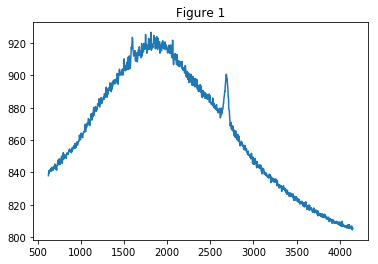

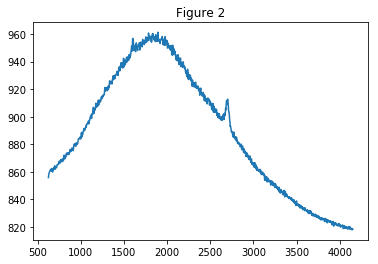

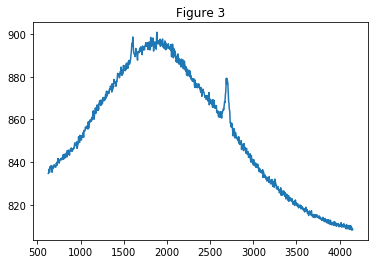

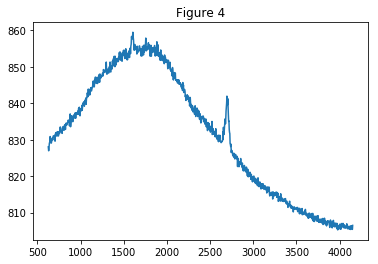

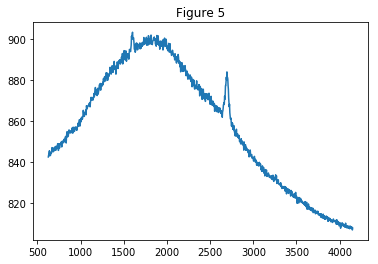

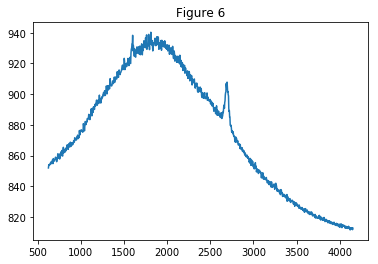

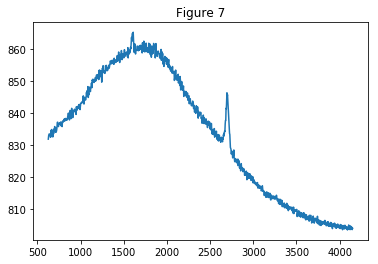

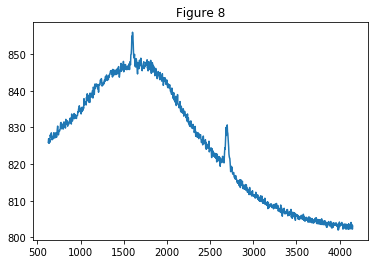

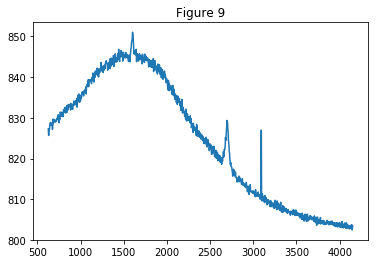

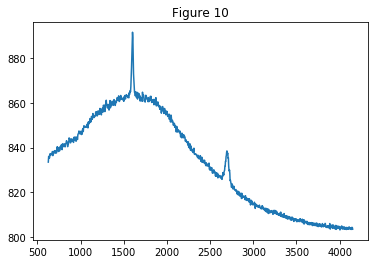

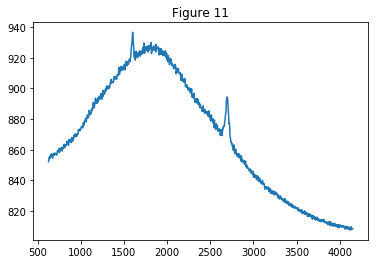

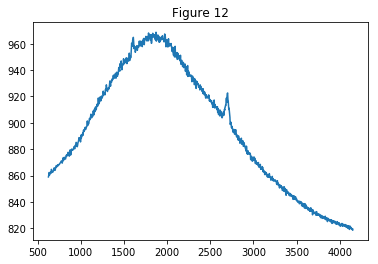

In [7]:
# import data for batch processing

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2017.07.20_Gr_Cu'

# import data from each file
data = np.empty
for filename in os.listdir(path):
    fpath = path + '\\' + filename
    f = open(fpath,'r')
    x = []
    for line in f:
        x.append(float(line))    
    data = np.append(data, x)

# reshape into matrix, each file has its own row
# ORDERING ISSUE HERE
num_files = len(os.listdir(path))
data = data[1:] 
data = data.reshape((num_files, int(len(data) / num_files)))

# iteratively plot data 
idx = int(data.shape[0] / 2)
for i in range(idx):
    plt.figure(i)
    py.title('Figure ' + str(i+1))
    py.plot(data[i],data[i+idx])
    py.show()

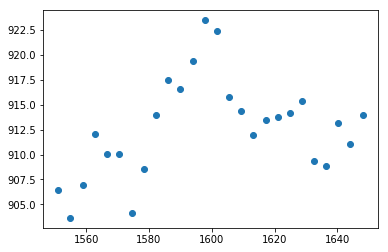

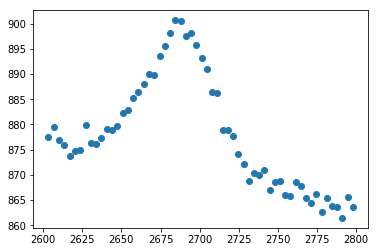

In [92]:
# automatically select the appropriate ranges in the data (one measurment)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# convert to numpy arrays
x1_np = np.array(x1)
y1_np = np.array(y1)

# select G peak
x1_G = x1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]
y1_G = y1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]

# select 2D peak
x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(1)
py.scatter(x1_G,y1_G)

plt.figure(2)
py.scatter(x1_2D,y1_2D)


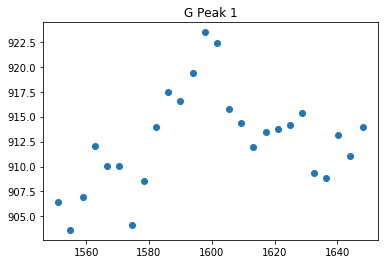

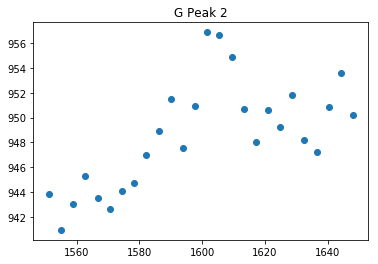

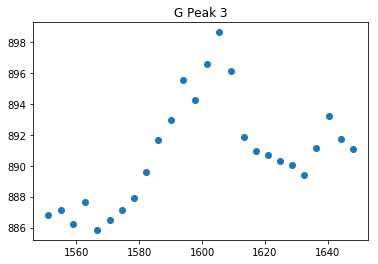

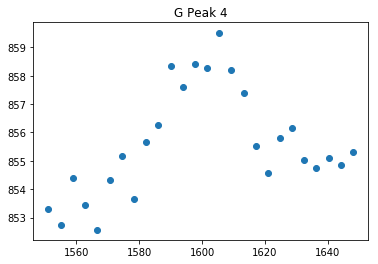

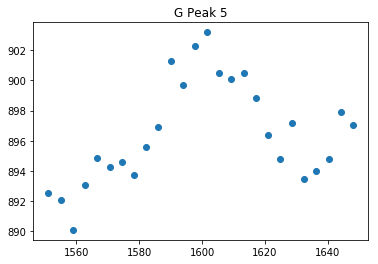

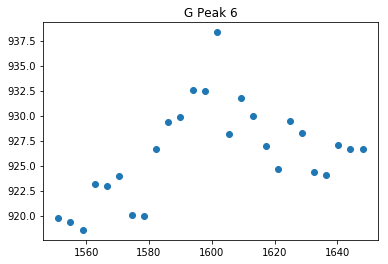

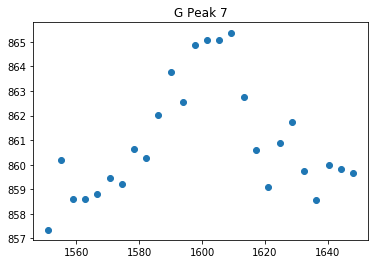

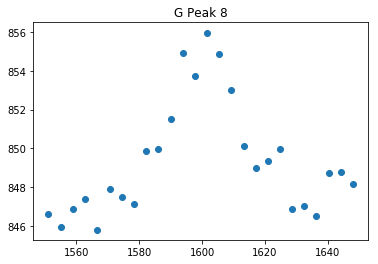

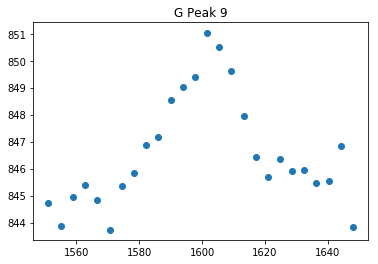

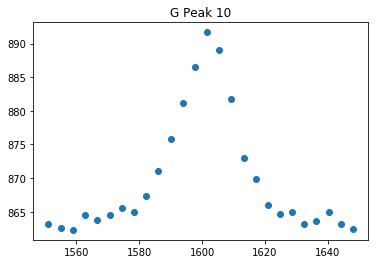

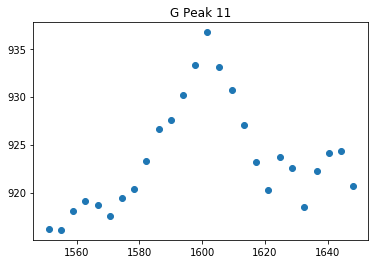

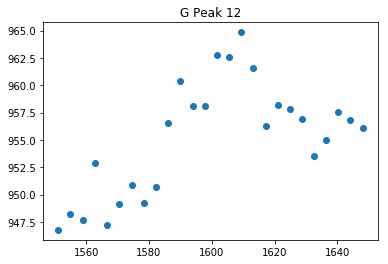

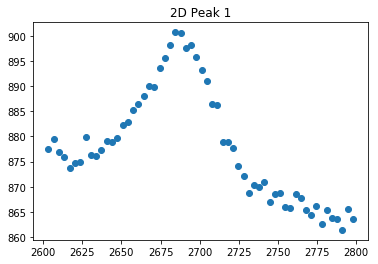

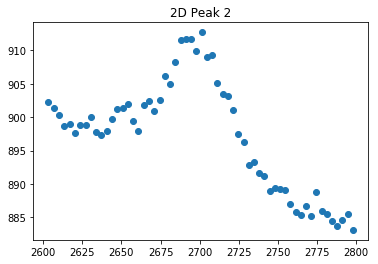

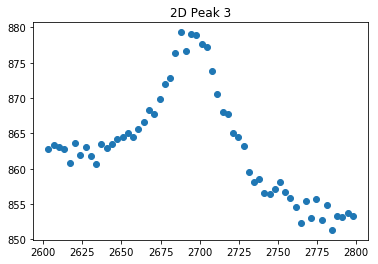

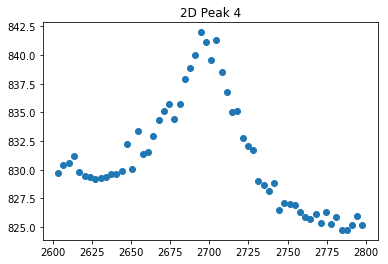

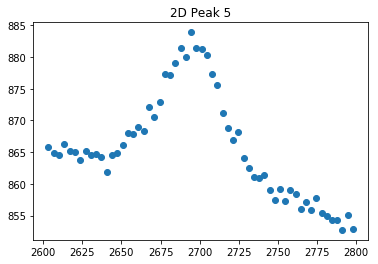

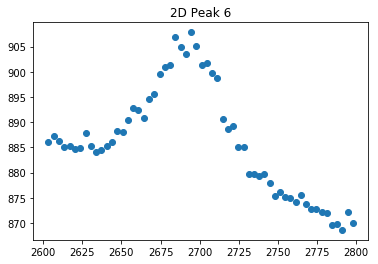

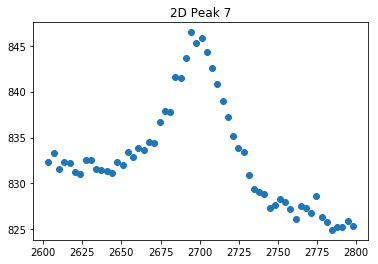

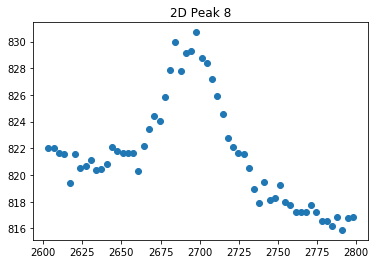

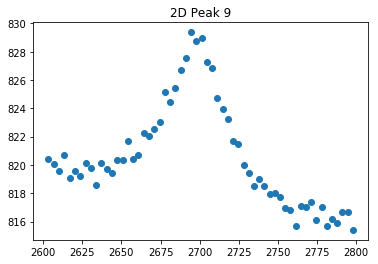

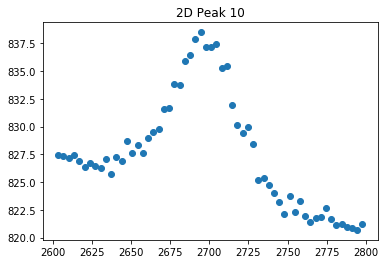

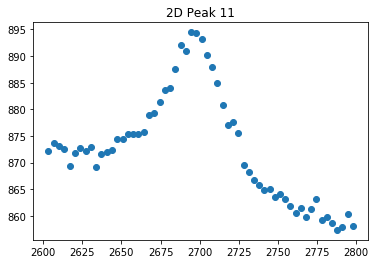

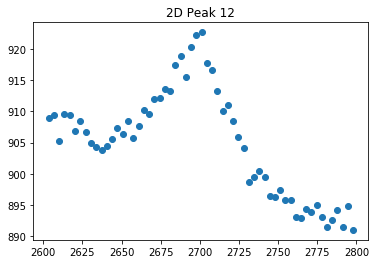

In [81]:
# automatically select peak ranges (batch processing)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# select peaks
data_G = np.array([])
data_2D = np.array([])
idx = data.shape[0] // 2
for i in range(data.shape[0]):
    if i < idx:
        row = data[i]
        row2 = row[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row2)
        row3 = row[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row3)
    else:    
        row = data[i - idx]
        row2 = data[i]
        row3 = row2[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row3)
        row4 = row2[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row4)
# each measurement is a row
data_G = data_G.reshape(idx*2, len(data_G) // (idx*2)) 
data_2D = data_2D.reshape(idx*2, len(data_2D) // (idx*2)) 

# iteratively plot data  
for i in range(idx):
    plt.figure(i)
    py.title('G Peak ' + str(i+1))
    py.scatter(data_G[i],data_G[i+idx])
    py.show()
for i in range(idx):
    plt.figure(i+idx)
    py.title('2D Peak ' + str(i+1))
    py.scatter(data_2D[i], data_2D[i+idx])
    py.show()
    


In [ ]:
# background subtraction

